In [45]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score , ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn import datasets
import mlflow


In [22]:
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")

x,y = datasets.load_iris(return_X_y=True)

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=.2 , random_state=42)

In [23]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [26]:
parameters = {
    "C":[0.001 , 0.01 , 0.1 , 10 , 100 , 1000],
    "kernel":["linear" , "poly" , "sigmoid" , "rbf" ],
    "gamma":[0.001 , 0.01 , 0.1 , 10 , 100 , 1000 , "auto" , "scale"],
    "degree":[1,2,3,4,5,6,7],
}

In [28]:
grid_search = GridSearchCV(estimator=SVC() , param_grid=parameters )
grid_search.fit(X_train , Y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 10, 100, 1000],
                         'degree': [1, 2, 3, 4, 5, 6, 7],
                         'gamma': [0.001, 0.01, 0.1, 10, 100, 1000, 'auto',
                                   'scale'],
                         'kernel': ['linear', 'poly', 'sigmoid', 'rbf']})

In [31]:
best_model = grid_search.best_estimator_
best_model.predict([X_test[1]]) , Y_test[1]

(array([0]), 0)

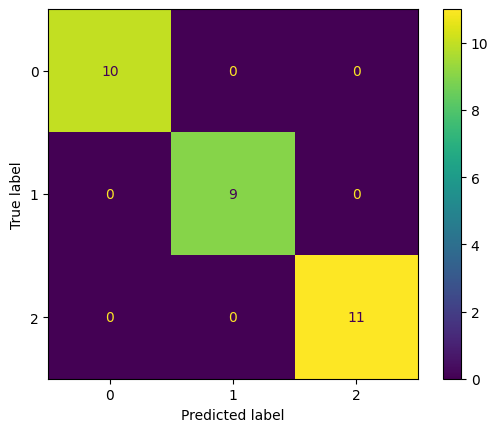

In [46]:
Y_pred = best_model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred )
matrix  = ConfusionMatrixDisplay.from_predictions(Y_test , Y_pred)

In [47]:
import mlflow.models


mlflow.set_experiment("MLFLOW Basics")

with mlflow.start_run():
    mlflow.log_params(params=parameters)
    mlflow.log_metrics({"accuracy":accuracy })
    mlflow.log_figure(matrix.figure_ , "iris_svm_confmat.png")
    sign = mlflow.models.infer_signature(X_train , best_model.predict(X_train))
    model_info = mlflow.sklearn.log_model(
        sk_model=best_model,
        artifact_path="iris",
        signature = sign,
        input_example= X_train )
    

c:\Users\hp\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


🏃 View run salty-colt-453 at: http://127.0.0.1:5000/#/experiments/941950269632016638/runs/a0057e058abe40e0bcdd5a6f757c9a9e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/941950269632016638
